<a href="https://colab.research.google.com/github/rushikeshburle/Naive-Bayes-project/blob/main/Naive_Bayes_SML_Batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Bayes**

In [ ]:
# load dataset
from sklearn.datasets import load_iris

In [ ]:
X,y = load_iris(return_X_y=True, as_frame=True)

In [ ]:
y_train.value_counts()

target
1    38
2    37
0    37
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2529,stratify=y)


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92        12
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92        12
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



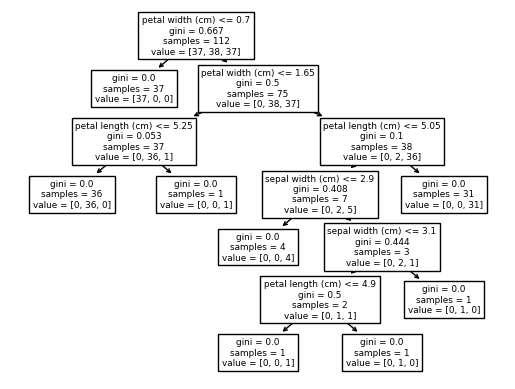

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
plot_tree(dtc, feature_names=X.columns);

In [ ]:
X.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2


In [ ]:
model.predict([[4.8,	3.4,	3.9,	1.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

# **Women Clothing Reviews**

In [ ]:
# step 1: import library
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/ProjectHub/raw/main/Women%20Clothing%20E-Commerce%20Review.csv')

In [ ]:
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [ ]:
df.isna().sum()

Clothing ID             0
Age                     0
Title                3810
Review                845
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
# step 3: define y , X
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

In [ ]:
y = df['Rating']
X = df['Review']

In [ ]:
X

2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
5        I love tracy reese dresses, but this one is no...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review, Length: 19662, dtype: object

In [ ]:
# step 4: train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

In [ ]:
X_train

7905     Love this top, i would have bought two but the...
3591     I read some of the other reviews and was surpr...
19338    I can't believe how small this thing runs. bey...
21968    I love the model's pairing of this sweatshirt ...
6496     Love love love this jumpsuit! normally i stay ...
                               ...                        
5504     When this dressed first debuted, i pretty much...
4407     I love this dress so much, i've considered get...
3483     Beautifully constructed and designed, this lov...
9237     I initially saw this sweater in the store and ...
16347    I purchased this top in the white and love the...
Name: Review, Length: 14746, dtype: object

In [ ]:
# Tokenization
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(lowercase=True, analyzer='word', ngram_range=(1,2), stop_words= 'english',max_features=5000)

In [ ]:
X_train = cv.fit_transform(X_train)

In [ ]:
cv.get_feature_names_out()

array(['00', '00p', '0p', ..., 'zipped', 'zipper', 'zippers'],
      dtype=object)

In [ ]:
X_test = cv.transform(X_test)

In [ ]:
X_train.toarray().shape

(14746, 5000)

In [ ]:
# step 5
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [ ]:
# step 6:
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
# step 7:
y_pred = model.predict(X_test)

In [ ]:
# step 8: evaluate
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.35      0.24      0.29       168
           2       0.28      0.25      0.27       340
           3       0.37      0.46      0.41       604
           4       0.38      0.35      0.37      1116
           5       0.79      0.80      0.79      2688

    accuracy                           0.60      4916
   macro avg       0.43      0.42      0.42      4916
weighted avg       0.59      0.60      0.60      4916



In [ ]:
y.value_counts()

Rating
5    10858
4     4289
3     2464
2     1360
1      691
Name: count, dtype: int64

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf')

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.30      0.02      0.03       168
           2       0.31      0.06      0.11       340
           3       0.40      0.39      0.40       604
           4       0.44      0.20      0.27      1116
           5       0.69      0.96      0.80      2688

    accuracy                           0.62      4916
   macro avg       0.43      0.33      0.32      4916
weighted avg       0.56      0.62      0.56      4916

